In [1]:
import pandas as pd

# ..//experiment/pc5/CHHCO/output

# median hypervolume value: 0.644902 in 0th run
# best hypervolume value: 0.678832 in 19th run

# load data
median_id = 0
df = pd.read_csv('../experiment/pc5/CHHCO/output/selected.%s.txt'%(median_id), header=None)
df.columns = ['choice']
iterations = 10000 // 210 # fe divided by population size

df = df.head(iterations - 8) # |choices| = iterations minus population initialization

dflist = []
for i in range(0,8):
    dfi = df['choice'] == i
    dfi = dfi.cumsum()
    dflist.append(dfi)
    
df = pd.concat(dflist, axis=1)
df.columns = ['SPEA2', 'CMOEAD', 'NSGAII', 'CMOMBI2', 'NSGAIII', 'ThetaDEA', 'SPEA2SDE', 'HypE']


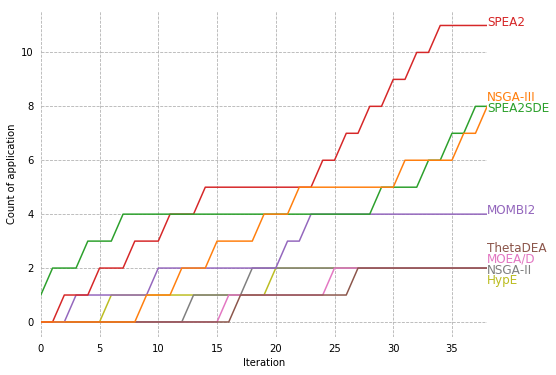

,SPEA2,CMOEAD,NSGAII,CMOMBI2,NSGAIII,ThetaDEA,SPEA2SDE,HypE
38,11,2,2,4,8,2,8,2


In [3]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

f = plt.figure(figsize=(8, 6))
ax = f.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

colors={
    "NSGAIII": "tab:orange",
    "SPEA2SDE": "tab:green",
    "SPEA2": "tab:red",
    "CMOMBI2": "tab:purple",
    "ThetaDEA": "tab:brown",
    "CMOEAD": "tab:pink",
    "NSGAII": "tab:grey",
    "HypE": "tab:olive"
}

labels={
    "NSGAIII": "NSGA-III",
    "SPEA2SDE": "SPEA2SDE",
    "SPEA2": "SPEA2",
    "CMOMBI2": "MOMBI2",
    "ThetaDEA": "ThetaDEA",
    "CMOEAD": "MOEA/D",
    "NSGAII": "NSGA-II",
    "HypE": "HypE"
}

offset={
    "NSGAIII": 0.2,
    "SPEA2SDE": -0.2,
    "SPEA2": 0.0,
    "CMOMBI2": 0.0,
    "ThetaDEA": 0.6,
    "CMOEAD": 0.2,
    "NSGAII": -0.2,
    "HypE": -0.6
}
dfmax = df.iloc[[-1]]
algs=["HypE","NSGAII","CMOEAD","ThetaDEA","CMOMBI2","SPEA2","SPEA2SDE","NSGAIII"]
for alg in algs:
    df.plot(y=alg, ax=f.gca(), legend=False, color=colors[alg])
    plt.text(38, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=12)
plt.xlabel("Iteration")
plt.ylabel("Count of application")
ax.grid(True, ls='--')
ax.tick_params(axis='both', which='both', # labelsize=14,
           bottom=False, top=False, labelbottom=True,
           left=False, right=False, labelleft=True)
plt.show()

dfmax
